In [2]:
# imports
import pandas as pd
import numpy as np

In [3]:
variants = ["bert_0", 
            "bert_rank",
            "bert_time",
            "bert_rank_time",
            "bert_user",
            "bert_user_rank",
            "bert_user_time",
            "bert_user_rank_time"]

In [4]:
# load variant files from ../../output/{variant}_measures_test.pkl
variant_files = [f"../../output/{v}_measures_test.pkl" for v in variants]
variant_dicts = [pd.read_pickle(f) for f in variant_files]


In [5]:
# read file output/training_measures_bert_0.json
import json
with open("../../output/training_measures_bert_0_1000.json", "r") as f:
    training_measures = json.load(f)

In [6]:
baseline_simple_acc = np.mean(training_measures["val_baseline_simple_accuracy_list"])
baseline_sampled_acc = np.mean(training_measures["val_baseline_sampled_accuracy_list"])
baseline_markov_acc = np.mean(training_measures["val_baseline_markov_1_accuracy_list"])

In [7]:
baseline_simple_acc, baseline_sampled_acc, baseline_markov_acc

(0.2906424504518509, 0.1213754542171955, 0.2621230888366699)

/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

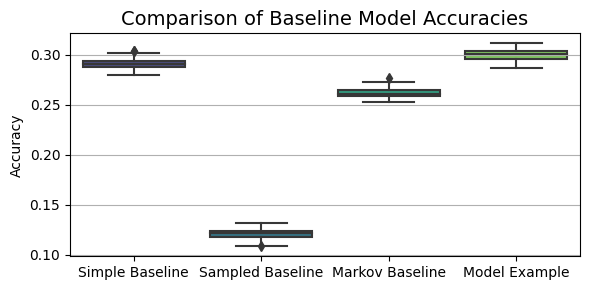

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data
data = {
    "Simple Baseline": training_measures["val_baseline_simple_accuracy_list"][-50:],
    "Sampled Baseline": training_measures["val_baseline_sampled_accuracy_list"][-50:],
    "Markov Baseline": training_measures["val_baseline_markov_1_accuracy_list"][-50:],
    "Model Example": training_measures["val_accuracy_list"][-50:],
}
df = pd.DataFrame(data)


# Create the boxplot
# set figure size
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, palette="viridis")
plt.ylabel("Accuracy")
plt.title("Comparison of Baseline Model Accuracies", fontsize=14)
# add horizontal gridlines
plt.grid(axis="y")

plt.tight_layout()

# Save the figure
plt.savefig("../../figures/baseline_model_accuracies.png", dpi = 300)
plt.show()


In [9]:
# extract "accuracy_list" from all valriant dicts
accuracy_lists = [d["accuracy_list"] for d in variant_dicts]


/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

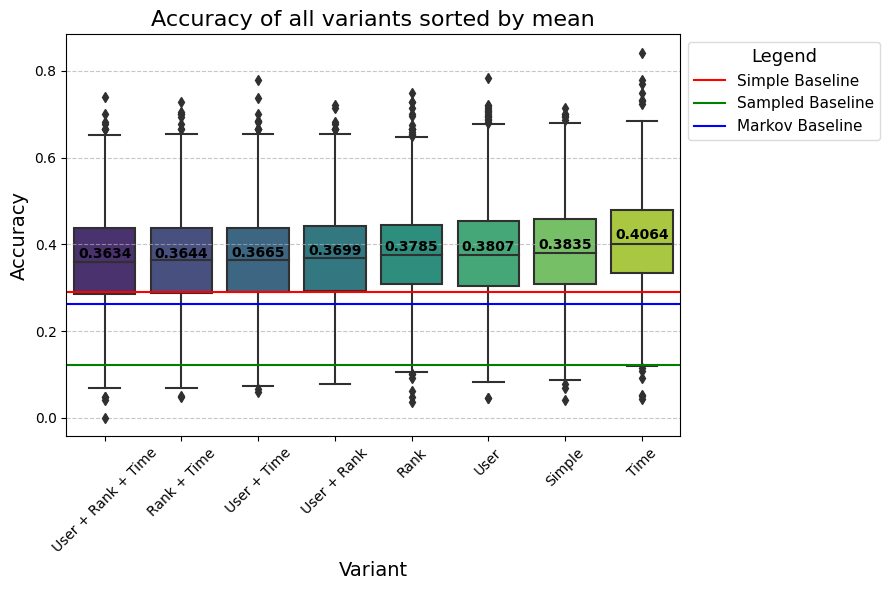

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming accuracy_lists, variants, and baseline accuracies are defined elsewhere

# Create a dataframe from the accuracy lists
df = pd.DataFrame(accuracy_lists).T
df.columns = variants

# Define your mapping here
label_mapping = {
    'bert_user_rank': 'User + Rank',
    'bert_user': 'User',
    'bert_user_time': 'User + Time',
    'bert_user_rank_time': 'User + Rank + Time',
    'bert_rank': 'Rank',
    'bert_time': 'Time',
    'bert_rank_time': 'Rank + Time',
    'bert_0': 'Simple',
}

# Sort the columns by the mean accuracy 
df_sorted = df.reindex(df.mean().sort_values().index, axis=1)

# Apply the mapping to the sorted columns for the plot labels
sorted_labels = [label_mapping.get(col, col) for col in df_sorted.columns]

# Create the boxplot
plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=df_sorted, orient="v", palette="viridis")

# Update the x-axis with the sorted new labels
plt.xticks(ticks=range(len(sorted_labels)), labels=sorted_labels, rotation=45)

# Plot mean accuracy values as text above the boxes
means_sorted = df_sorted.mean()
for i, mean in enumerate(means_sorted):
    y_position = mean + 0.005  # Adjust as needed
    plt.text(i, y_position, f'{mean:.4f}', horizontalalignment='center', size='medium', color='black', weight='semibold')

# Plot the baseline accuracies as horizontal lines and label them
plt.axhline(y=baseline_simple_acc, color='r', linestyle='-', label="Simple Baseline")
plt.axhline(y=baseline_sampled_acc, color='g', linestyle='-', label="Sampled Baseline")
plt.axhline(y=baseline_markov_acc, color='b', linestyle='-', label="Markov Baseline")

# Enhancements for readability
plt.xlabel("Variant", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy of all variants sorted by mean", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting the legend to be outside the plot
plt.legend(title="Legend", title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1), framealpha=0.7)

plt.tight_layout(rect=[0,0,0.75,1]) # Adjust the right margin to make space for the legend

# Save plot to file
plt.savefig("../../figures/accuracy_boxplot_custom_labels_corrected.png", dpi=300)

plt.show()


In [11]:
# load data from csv
DATASET_PATH = "../../data/data_all_features_200.csv"
df = pd.read_csv(DATASET_PATH)

In [12]:
df

,Unnamed: 0,user,year,month,day,hour,30min_interval,timestamp,stoplocation,latitude,longitude,lat_bin,lon_bin,date,label,week_of_year,user_week,pos,day_of_week,rank
0,0,0.0,2014,1,5,23,2.0,2014-01-05 23:30:43,1,55.784375,12.525062,143,144,2014-01-06 00:00:00,stop,2,u00_w02,"(143, 144)",0,1
1,1,0.0,2014,1,6,17,2.0,2014-01-06 17:30:24,1,55.784375,12.525062,143,144,2014-01-06 18:00:00,stop,2,u00_w02,"(143, 144)",0,1
2,2,0.0,2014,1,7,16,2.0,2014-01-07 16:30:24,1,55.784375,12.525062,143,144,2014-01-07 17:00:00,stop,2,u00_w02,"(143, 144)",1,1
3,3,0.0,2014,1,8,16,1.0,2014-01-08 16:00:46,1,55.784375,12.525062,143,144,2014-01-08 16:30:00,stop,2,u00_w02,"(143, 144)",2,1
4,4,0.0,2014,1,9,16,2.0,2014-01-09 16:30:10,1,55.784375,12.525062,143,144,2014-01-09 17:00:00,stop,2,u00_w02,"(143, 144)",3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244687,244687,99.0,2014,6,7,20,1.0,2014-06-07 20:01:25,42,55.771064,12.507603,136,139,2014-06-07 20:30:00,stop,23,u99_w23,"(136, 139)",5,46
244688,244688,99.0,2014,6,7,22,1.0,2014-06-07 22:04:03,75,55.741883,12.492958,120,135,2014-06-07 22:30:00,stop,23,u99_w23,"(120, 135)",5,46
244689,244689,99.0,2014,6,18,14,2.0,2014-06-18 14:32:33,107,55.769721,12.505166,135,138,2014-06-18 15:00:00,stop,25,u99_w25,"(135, 138)",2,46
244690,244690,99.0,2014,6,19,14,2.0,2014-06-19 14:34:57,3,55.745556,12.494979,122,136,2014-06-19 15:00:00,stop,25,u99_w25,"(122, 136)",3,46


/tmp/ipykernel_41541/2218489089.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=top_10, x='rank', y='percentage', estimator=np.mean, ci='sd', color='skyblue', capsize=0.2)
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtyp

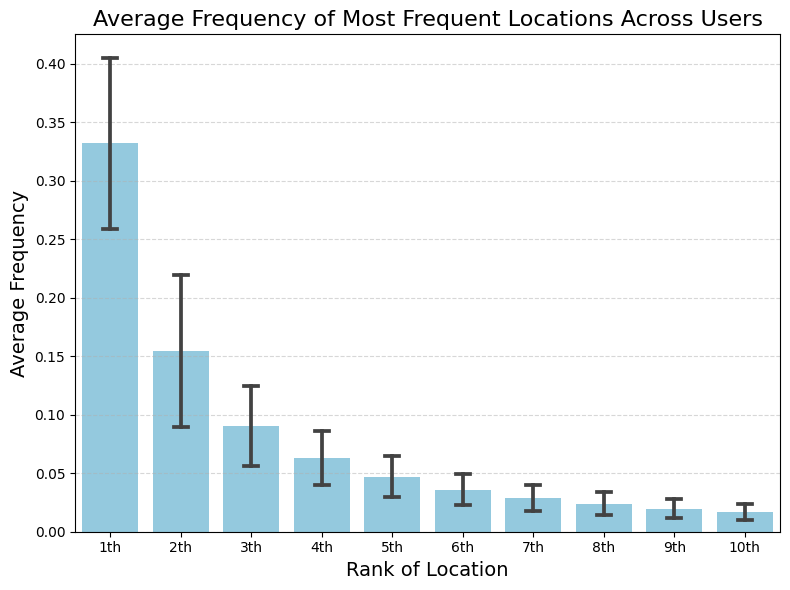

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and it has columns 'user' and 'pos' for user IDs and positions, respectively

# Step 1: Compute relative frequencies for each user and position
relative_freqs = df.groupby('user')['pos'].value_counts(normalize=True).rename('percentage').reset_index()

# Step 2: Select the top 10 percentages for each user
top_10 = relative_freqs.groupby('user').apply(lambda x: x.nlargest(10, 'percentage')).reset_index(drop=True)

# Prepare data for plotting with Seaborn
# Assign rank (1st, 2nd, ... 10th) to each row within groups sorted by percentage
top_10['rank'] = top_10.groupby('user').cumcount() + 1
# We'll use 'rank' as the x-axis and 'percentage' as the y-axis

# Step 3: Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=top_10, x='rank', y='percentage', estimator=np.mean, ci='sd', color='skyblue', capsize=0.2)

plt.xlabel("Rank of Location", fontsize=14)
plt.ylabel("Average Frequency", fontsize=14)
plt.title("Average Frequency of Most Frequent Locations Across Users", fontsize=16)
plt.xticks(np.arange(10), [f'{i}th' for i in range(1, 11)])  # Adjusting x-ticks for readability

plt.tight_layout()
# add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Save the figure
plt.savefig("../../figures/top_10_positions.png", dpi = 300)
plt.show()


/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

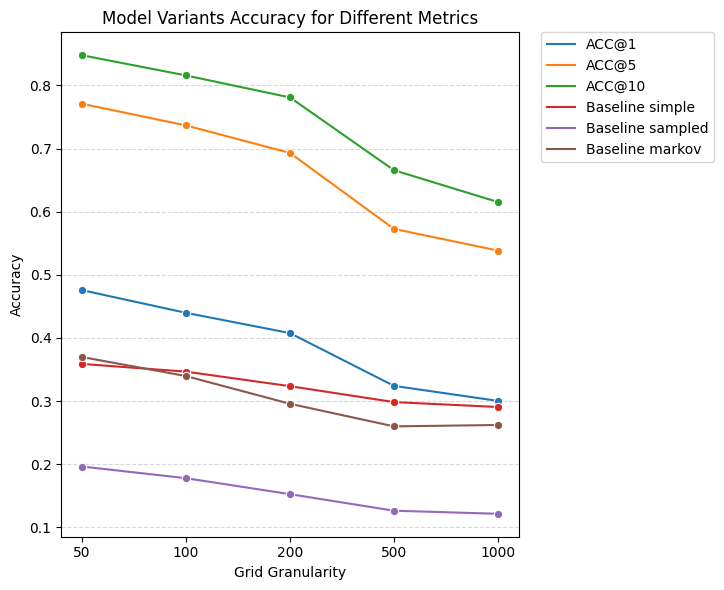

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Original data preparation
data = {
    'Model Name': ['bert_50', 'bert_100', 'bert_200', 'bert_500', 'bert_1000'],
    'ACC@1': [0.4757, 0.4398, 0.4077, 0.3241, 0.3003],
    'ACC@5': [0.7710, 0.7367, 0.6931, 0.5728, 0.5385],
    'ACC@10': [0.8479, 0.8159, 0.7811, 0.6658, 0.6154],
    'Baseline simple': [0.3589, 0.3466, 0.3236, 0.2984, 0.2906],
    'Baseline sampled': [0.1963, 0.1778, 0.1525, 0.1263, 0.1214],
    'Baseline markov': [0.3698, 0.3396, 0.2957, 0.2599, 0.2621]
}

df = pd.DataFrame(data)

# Simplify 'Model Name' to just the numeric part and rename to 'Granularity'
df['Granularity'] = df['Model Name'].str.extract('(\d+)').astype(str)
df.drop(columns=['Model Name'], inplace=True)

# Melt the DataFrame for plotting
df_melted = pd.melt(df, id_vars=['Granularity'], var_name='Metric', value_name='Accuracy')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Granularity', y='Accuracy', hue='Metric', marker='o')
# plt.xlabel('Grid Granularity')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(df['Granularity'].unique())  # Ensure we only have ticks for existing granularities

# Moving the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.tight_layout(rect=[0,0,0.75,1])  # Adjust the layout to make space for the legend
plt.show()
